In [15]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## Шаг 1. Импорт библиотек и подготовка данных

In [7]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Загрузка данных
df = pd.read_csv('diabetes.csv')

# Разделение на признаки и целевую переменную
X = df.drop('Outcome', axis=1)  # Все признаки, кроме 'Outcome'
y = df['Outcome']  # Целевая переменная

## Шаг 2. Разделение данных на обучающую и тестовую выборку

In [8]:
# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Шаг 3. Масштабирование признаков

In [9]:
# Масштабирование признаков
scaler = StandardScaler()  # Инициализация стандартизатора
X_train_scaled = scaler.fit_transform(X_train)  # Обучаем и применяем на обучающих данных
X_test_scaled = scaler.transform(X_test)  # Применяем масштабирование на тестовых данных


## Шаг 4. Подготовка диапазона значений гиперпараметра C и обучение модели

In [10]:
# Подготовка диапазона значений гиперпараметра C
C_values = np.logspace(-4, 4, 20)  # Логарифмический диапазон значений от 10^-4 до 10^4

# Инициализация списка для хранения значений AUC-ROC
auc_scores = []

# Обучение модели для каждого значения C и вычисление AUC-ROC
for C in C_values:
    logreg = LogisticRegression(C=C, max_iter=1000)  # Логистическая регрессия
    logreg.fit(X_train_scaled, y_train)  # Обучение модели
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Вероятности для класса 1
    auc = roc_auc_score(y_test, y_pred_prob)  # Вычисление AUC-ROC
    auc_scores.append(auc)  # Сохранение результата


## Шаг 5. Вывод результатов для каждого значения C

In [11]:
# Выводим результаты для каждого значения C
for C, auc in zip(C_values, auc_scores):
    print(f'C = {C:.4f}, AUC-ROC = {auc:.4f}')


C = 0.0001, AUC-ROC = 0.7762
C = 0.0003, AUC-ROC = 0.7762
C = 0.0007, AUC-ROC = 0.7778
C = 0.0018, AUC-ROC = 0.7818
C = 0.0048, AUC-ROC = 0.7892
C = 0.0127, AUC-ROC = 0.7952
C = 0.0336, AUC-ROC = 0.7981
C = 0.0886, AUC-ROC = 0.7984
C = 0.2336, AUC-ROC = 0.7986
C = 0.6158, AUC-ROC = 0.7981
C = 1.6238, AUC-ROC = 0.7977
C = 4.2813, AUC-ROC = 0.7971
C = 11.2884, AUC-ROC = 0.7973
C = 29.7635, AUC-ROC = 0.7972
C = 78.4760, AUC-ROC = 0.7972
C = 206.9138, AUC-ROC = 0.7972
C = 545.5595, AUC-ROC = 0.7972
C = 1438.4499, AUC-ROC = 0.7972
C = 3792.6902, AUC-ROC = 0.7972
C = 10000.0000, AUC-ROC = 0.7972


## Шаг 6. Получение AUC-ROC для дефолтного значения C = 1

In [12]:
# Получение AUC-ROC для дефолтного значения C=1
logreg_default = LogisticRegression(C=1, max_iter=1000)  # Логистическая регрессия с дефолтным C
logreg_default.fit(X_train_scaled, y_train)  # Обучение модели
y_pred_prob_default = logreg_default.predict_proba(X_test_scaled)[:, 1]  # Прогнозирование вероятности
auc_default = roc_auc_score(y_test, y_pred_prob_default)  # Вычисление AUC-ROC

# Вывод AUC-ROC для дефолтного C
print(f'AUC-ROC для дефолтного значения C=1: {auc_default:.4f}')


AUC-ROC для дефолтного значения C=1: 0.7980


## Шаг 7. Построение графика зависимости AUC-ROC от значения C

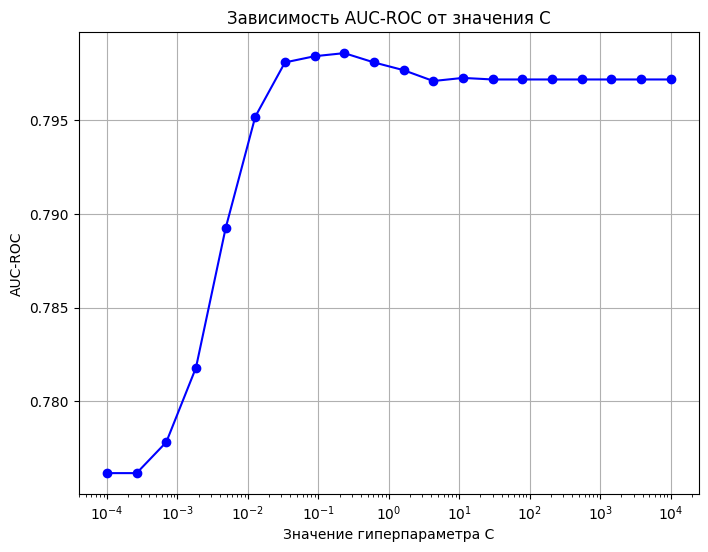

In [17]:
# Построение графика зависимости AUC-ROC от значения C
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(C_values, auc_scores, marker='o', linestyle='-', color='b')  # Линия AUC-ROC от C
plt.xscale('log')  # Логарифмическая шкала по оси X для C
plt.xlabel('Значение гиперпараметра C')  # Подпись оси X
plt.ylabel('AUC-ROC')  # Подпись оси Y
plt.title('Зависимость AUC-ROC от значения C')  # Заголовок графика
plt.grid(True)  # Включение сетки
plt.show()  # Отображение графика


## Шаг 8. Построение графика "Подбор коэффициента регуляризации"

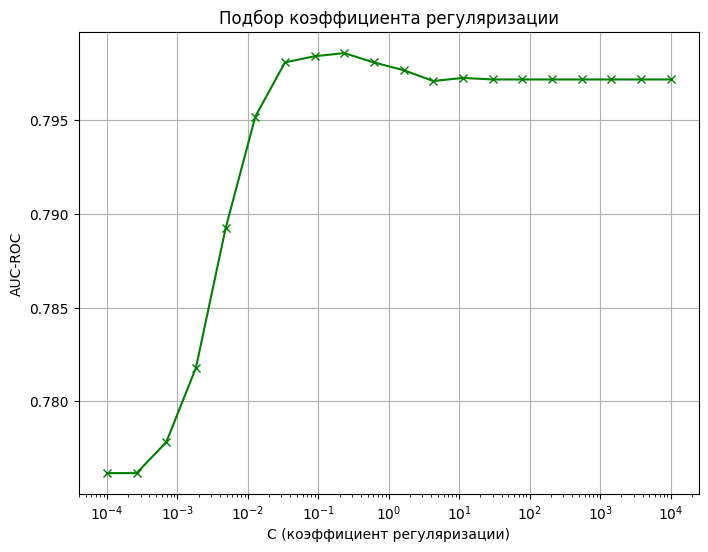

In [16]:
# График "Подбор коэффициента регуляризации"
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(C_values, auc_scores, marker='x', linestyle='-', color='g')  # Линия AUC-ROC от C
plt.xscale('log')  # Логарифмическая шкала по оси X для C
plt.xlabel('C (коэффициент регуляризации)')  # Подпись оси X
plt.ylabel('AUC-ROC')  # Подпись оси Y
plt.title('Подбор коэффициента регуляризации')  # Заголовок графика
plt.grid(True)  # Включение сетки
plt.show()  # Отображение графика


C = 0.0001, AUC-ROC = 0.7762
C = 0.0003, AUC-ROC = 0.7762
C = 0.0007, AUC-ROC = 0.7778
C = 0.0018, AUC-ROC = 0.7818
C = 0.0048, AUC-ROC = 0.7892
C = 0.0127, AUC-ROC = 0.7952
C = 0.0336, AUC-ROC = 0.7981
C = 0.0886, AUC-ROC = 0.7984
C = 0.2336, AUC-ROC = 0.7986
C = 0.6158, AUC-ROC = 0.7981
C = 1.6238, AUC-ROC = 0.7977
C = 4.2813, AUC-ROC = 0.7971
C = 11.2884, AUC-ROC = 0.7973
C = 29.7635, AUC-ROC = 0.7972
C = 78.4760, AUC-ROC = 0.7972
C = 206.9138, AUC-ROC = 0.7972
C = 545.5595, AUC-ROC = 0.7972
C = 1438.4499, AUC-ROC = 0.7972
C = 3792.6902, AUC-ROC = 0.7972
C = 10000.0000, AUC-ROC = 0.7972
AUC-ROC для дефолтного значения C=1: 0.7980


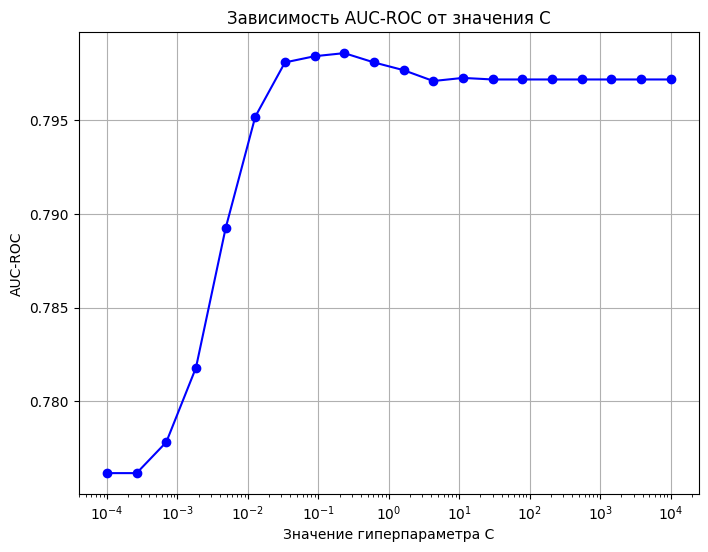

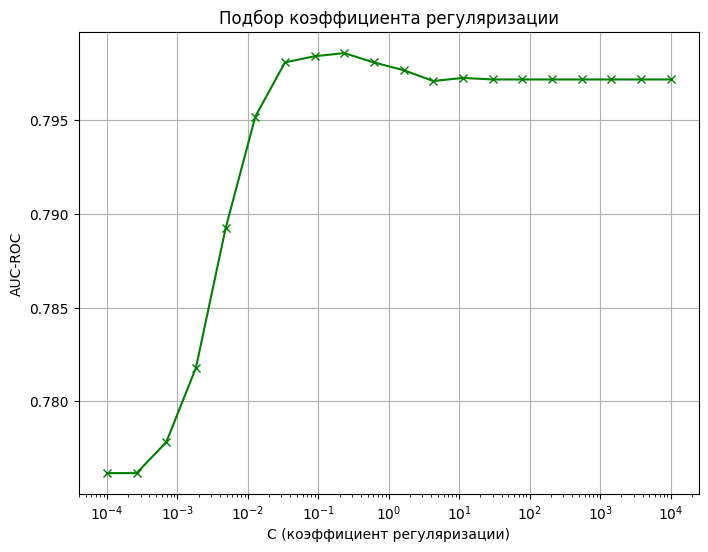

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Загрузка данных
df = pd.read_csv('diabetes.csv')

# Разделение на признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Подготовка диапазона значений гиперпараметра C
C_values = np.logspace(-4, 4, 20)

# Инициализация списка для хранения значений AUC-ROC
auc_scores = []

# Обучение модели для каждого значения C и вычисление AUC-ROC
for C in C_values:
    logreg = LogisticRegression(C=C, max_iter=1000)
    logreg.fit(X_train_scaled, y_train)
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores.append(auc)

# Выводим результаты для каждого значения C
for C, auc in zip(C_values, auc_scores):
    print(f'C = {C:.4f}, AUC-ROC = {auc:.4f}')

# Получение AUC-ROC для дефолтного значения C=1
logreg_default = LogisticRegression(C=1, max_iter=1000)
logreg_default.fit(X_train_scaled, y_train)
y_pred_prob_default = logreg_default.predict_proba(X_test_scaled)[:, 1]
auc_default = roc_auc_score(y_test, y_pred_prob_default)

print(f'AUC-ROC для дефолтного значения C=1: {auc_default:.4f}')

# Построение графика зависимости AUC-ROC от значения C
plt.figure(figsize=(8, 6))
plt.plot(C_values, auc_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Логарифмическая шкала по оси X для C
plt.xlabel('Значение гиперпараметра C')
plt.ylabel('AUC-ROC')
plt.title('Зависимость AUC-ROC от значения C')
plt.grid(True)
plt.show()

# График "Подбор коэффициента регуляризации"
plt.figure(figsize=(8, 6))
plt.plot(C_values, auc_scores, marker='x', linestyle='-', color='g')
plt.xscale('log')
plt.xlabel('C (коэффициент регуляризации)')
plt.ylabel('AUC-ROC')
plt.title('Подбор коэффициента регуляризации')
plt.grid(True)
plt.show()
